# Importing Basic Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
# removing the unnamed: 0 col

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
# checking for duplicated rows

df.duplicated().sum()

29

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [9]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
    
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [10]:
'''
so on observation we can see that if we remove "GB" from RAM,i can 
make it as an integer value then after,now same goes with Memory as 
well as Weight,for Weight i can classify it as floating variable
using the str.replace() as shown ↓
'''

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting from string->integer for ram column

df['Ram'] = df['Ram'].astype('int32')

# converting from string-> float for the weight column

df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis

C:\Users\Vishal\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Price', ylabel='Density'>

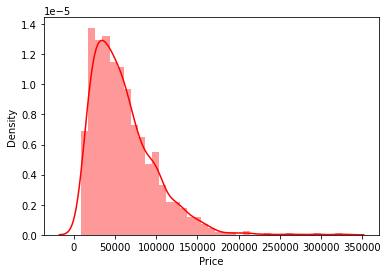

In [12]:
# viewing the distribution of the price column

sn.distplot(df['Price'],color='red')

In [13]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['Company', 'TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

ValueError: could not convert string to float: 'Apple'

<Figure size 1080x504 with 0 Axes>

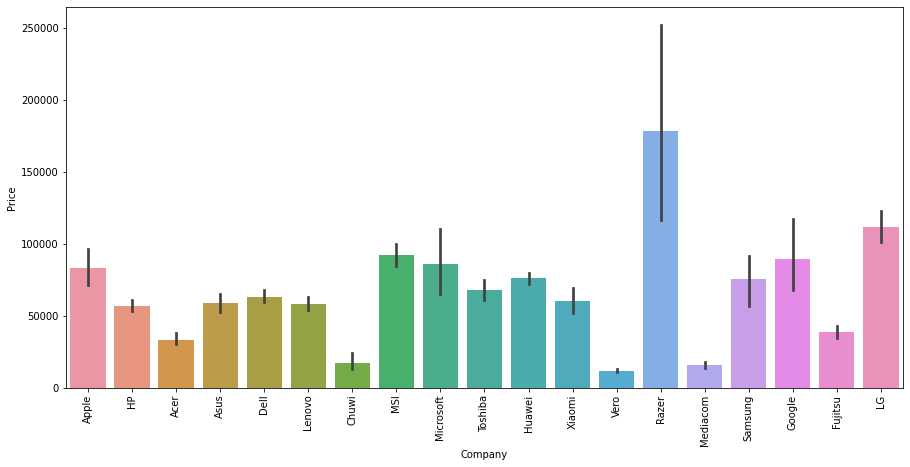

In [14]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [15]:
## various types of laptops

sn.countplot(df['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')

ValueError: could not convert string to float: 'Ultrabook'

In [ ]:
# laptop type and variation about the price 

sn.barplot(x = df['TypeName'],y = df['Price'],ci = 'sd')
plt.xticks(rotation = 'vertical')



In [ ]:
# variation of inches towards the price

sn.scatterplot(x = df['Inches'],y = df['Price'])

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [ ]:
df['ScreenResolution'].value_counts()

In [ ]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                      if 'Touchscreen' in element else 0)

df.head()

In [ ]:
df.sample(5)

In [ ]:
sn.countplot(df['TouchScreen'],palette='plasma')

In [ ]:
# touch screen on comparision with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [ ]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

In [ ]:
sn.countplot(df['IPS'],palette='plasma')

In [ ]:
# price variation with respect to the IPS col

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

### Extracting the X Resolution and the Y Resolution

In [ ]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

In [ ]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

In [ ]:
'''
So basically from that whole text of the X_res col,we need to 
extract the digits from it,but the problem is the numbers are scattered 
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.? 
all the numbers which come after an number and \d+ the string must end with number


'''


df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

In [ ]:
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

In [ ]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [ ]:
df.corr()['Price']

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [ ]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

In [ ]:
df.corr()['Price']

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop `Inches,X_res,Y_res` as well**

In [ ]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

**Now we will work on `CPU` column,as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [ ]:
df['Cpu'].value_counts()

**Most common processors are made by intel right,so we will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole**

**So if we observe we need to extract the first 3 words of the CPU column,as the first 3 words of every row under the CPU col is the type of the CPU,so we will be using them as shown ↓**

In [ ]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()


In [ ]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df

In [ ]:
sn.countplot(df['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')

In [ ]:
# price vs processor variation

sn.barplot(df['CPU_name'],df['Price'])
plt.xticks(rotation = 'vertical')

In [ ]:
## dropping the cpu column

df.drop(columns=['Cpu'],inplace=True)
df.head()

##### Analysis on the RAM column

In [ ]:
sn.countplot(df['Ram'],palette='autumn')

In [ ]:
## ram is having good relation with price

sn.barplot(df['Ram'],df['Price'])

##### About the memory column

**We will seperate the `Type` of memory and the value of it,just similar to the one which is done in the previous part**

**This part involves things which are needed to be done in steps,so here we do not have the memory as a complete we have it in different dimension as `128GB SSD +  1TB HDD`,so inorder to for it come in a same dimension we need to do some modifications which are done below as shown**

In [ ]:
df['Memory'].iloc[:1][0]

In [ ]:
# we have different categories and also different kinds of variations 

df['Memory'].value_counts()

In [ ]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

In [ ]:
# we will strip up all the white spaces,basically eliminating white space

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

In [ ]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

In [ ]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace('\D','')
df['first'].value_counts()

In [ ]:
df['Second'] = newdf[1]
df.head()

In [ ]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    

# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

In [ ]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

In [ ]:
# multiplying the elements and storing the result in subsequent columns


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

In [ ]:
df.corr()['Price']

**Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well**

In [ ]:
df.columns


In [ ]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

##### Analysis on GPU

In [ ]:
df['Gpu'].value_counts()

**Here as we are having less data regarding the laptops,its better that we focus on `GPU brands` instead focusing on the values which are present there beside them,we will focus on the `brands`**

In [ ]:
# this is what we will be doing,extracting the brands 
a = df['Gpu'].iloc[1]
print(a.split()[0])

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(df['Gpu brand'],palette='plasma')

In [ ]:
# removing the "ARM" tuple

df = df[df['Gpu brand']!='ARM']
sn.countplot(df['Gpu brand'],palette='plasma')

In [ ]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sn.barplot(df['Gpu brand'],df['Price'],estimator=np.median)

In [ ]:
df = df.drop(columns=['Gpu'])
df.head()

##### Operating System analysis

In [ ]:
df['OpSys'].value_counts()

In [ ]:
sn.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
df['OpSys'].unique()

In [ ]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

In [ ]:
df.sample(5)

In [ ]:
sn.countplot(df['OpSys'],palette='plasma')

In [ ]:
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')

###### Weight analysis 

In [ ]:
sn.distplot(df['Weight'])

In [ ]:
sn.scatterplot(df['Weight'],df['Price'])

##### Price Analysis

In [ ]:
sn.distplot(df['Price'])

In [ ]:
# so if we apply np.log to the Price col we get a gaussian distibution

sn.distplot(np.log(df['Price']))

In [ ]:
## correlation with price

df.corr()['Price']

In [ ]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

## Model Building

In [ ]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

**There's a Class which we imported named as `Column Trasnformer` we use this widely while building our models using `Pipelines`,so for this we have to get the index numbers of the columns which are having categorical variables**

In [ ]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

### Linear Regression

In [ ]:
X_train

In [ ]:
pipe

In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

In [ ]:
## now mae is 0.21 so if you want to check how much difference is there do this

## we see there is a difference of 1.23 only as per the orignal value
## that is our model predicts +-0.21 more/less than the original price!

np.exp(0.21)

### Ridge Regression

In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

### LassoRegression

In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

### Decision Tree

In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

### Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe2.pkl','wb'))

In [ ]:
train.head()

In [ ]:
train.to_csv('traineddata.csv',index=None)

## Hyperparameter Tuning for Random Forest 

In [ ]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

In [ ]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

In [ ]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [ ]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
ccp_alphas

In [ ]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

In [ ]:
alphalist

In [ ]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

**possible values of alpha can lie between `[0.0025-->0.0075]`**

In [ ]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [ ]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [ ]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

In [ ]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

In [ ]:
scores

In [ ]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

## Prediction on the whole Dataset

In [ ]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

In [ ]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
df['Predicted Price'] = np.array(ans)
df

In [ ]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Random Forest Regressor version_2

In [ ]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

In [ ]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

In [ ]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

In [ ]:
sn.distplot(data['Price'],hist=False,color='orange',label='Actual')
sn.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [ ]:
import pickle
file = open('laptoppricepredictorv3.pkl','wb')
pickle.dump(rf1,file)
file.close()

In [ ]:
X_train.iloc[0]